# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import json
import tweepy
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [8]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(r.content)


In [2]:
df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

In [12]:
#created list of tweet id's for the loop in the next cell to iterate through to access tweet information for the tweet_json.txt file
tweet_ids = df_twitter_archive['tweet_id']

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [13]:
#First 2 variables did contain my unique keys neede to access the API's and was successful.
consumer_key = #My consuner key was entered here to run this code
consumer_secret = #my consumer secret key was here to run this code
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)


# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            print("Success")
            outfile.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
        

print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 635


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Rate limit reached. Sleeping for: 637


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

In [3]:
#import twee_json.txt to a dataframe.
with open ('tweet_json.txt') as file:
    lines = file.readlines()
data = []
for line in lines:
    data.append(json.loads(line))

df_tweets = pd.DataFrame(data)
df_tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [4]:
#display columns to see all the names so I know what the exact names are to keep in my Step one checlist: Only keep tweet ID (id), retweet count (retweet_count) and favorite count (favorite_count)
df_tweets.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [5]:
#Select only the columns needed
df_tweets = df_tweets[['id', 'retweet_count', 'favorite_count']]
df_tweets.head()

,id,retweet_count,favorite_count
0,892420643555336193,6920,33014
1,892177421306343426,5221,28548
2,891815181378084864,3440,21464
3,891689557279858688,7134,36009
4,891327558926688256,7656,34440


In [6]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Tidiniess Issue: 
This issue I placed up here, as fixing this issue now will make it easier as I prepare to fix my other tidiness and quality issues

### Define:
Merger all the dataframes into 1 dataframe

In [135]:
df_master = df_twitter_archive.merge(df_image_predictions, how = 'left', on = 'tweet_id').merge(df_tweets, how = 'left', left_on = 'tweet_id', right_on = 'id')


### Test

In [136]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,8.924206e+17,6920.0,33014.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,8.921774e+17,5221.0,28548.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,8.918152e+17,3440.0,21464.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8.916896e+17,7134.0,36009.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8.913276e+17,7656.0,34440.0


In [9]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
#convert uncleaned dataframe to csv to visualize asses in a spreadsheet program
df_master.to_csv('master_data_uncleaned.csv', sep = ',', index = False)

In [11]:
df_master[df_master['name'] == 'None']['name'].value_counts()

None    745
Name: name, dtype: int64

In [12]:
print(df_master['doggo'].value_counts())
print(df_master['floofer'].value_counts())
print(df_master['pupper'].value_counts())
print(df_master['puppo'].value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


### Quality issues
1. the rating of the dog inside the text column, if the rating ended in .5 (example 9.5/10), the rating numerator only took the number after the decimal point.

2. Some tweets contained in the dataset are retweets, which mean that they show up twice in the dataset.

3. Remove columns with all null values

4. Change columns data types to proper data types

5. Some tweets don't have photos to go with it, which doesn't get a prediction and also shouldn't get a rating for accuracy. 

6. Majority of dogs are not categorized, could skim through the text with a list of strings likely to be in texts and categorize it.

7. Some dog names are not names. These seem to be indicated by just having lower case letters. removed rows that have only lowercase letters in the data.

8.  Fix columns to be easily understood:
    - p1 = first_prediction
    - p1_conf = first_prediction_confidence
    - p1_dog = first_prediction_is_dog
    - p2 = second_prediction
    - p2_conf = second_prediction_confidence
    -p2_dog = second_prediction_is_dog

### Tidiness issues
1. doggo, floofer, pupper, puppo could be put into 1 column with those options to pick inside the column.

2. Merge 3 Dataframes.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [31]:
# Make copies of original pieces of data
df_master_copy = df_master

In [14]:
df_master_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,8.924206e+17,6920.0,33014.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,8.921774e+17,5221.0,28548.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,8.918152e+17,3440.0,21464.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8.916896e+17,7134.0,36009.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8.913276e+17,7656.0,34440.0


### Issue #1:

#### Define: 
Clean columns to be understood better:
  - p1 = first_prediction
  - p1_conf = first_prediction_confidence
  - p1_dog = first_prediction_is_dog
  - p2 = second_prediction
  - p2_conf = second_prediction_confidence
  - p2_dog = second_prediction_is_dog
  - p3 = third_prediction
  - p3_conf = third_prediction_confidence
  - p3_dog = third_prediction_is_dog


#### Code

In [32]:
df_master_copy.rename(columns= {'p1': 'first_prediction',
                                'p1_conf': 'first_prediction_confidence',
                                'p1_dog': 'first_prediction_is_dog',
                                'p2' : 'second_prediction',
                                'p2_conf': 'second_prediction_confidence',
                                'p2_dog': 'second_prediction_is_dog',
                                'p3' : 'third_prediction',
                                'p3_conf': 'third_prediction_confidence',
                                'p3_dog' : 'third_prediction_is_dog'}, inplace = True)

#### Test

In [33]:
# a list of all the columns shows the columns have been updated
df_master_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'first_prediction', 'first_prediction_confidence',
       'first_prediction_is_dog', 'second_prediction',
       'second_prediction_confidence', 'second_prediction_is_dog',
       'third_prediction', 'third_prediction_confidence',
       'third_prediction_is_dog', 'id', 'retweet_count', 'favorite_count'],
      dtype='object')

### Issue #2:

#### Define
Remove the ID column as it is not needed as it is the same as the tweet id field.

#### Code

In [34]:
df_master_copy = df_master_copy.drop('id', axis = 1)

#### Test

In [35]:
#id column in no longer in the dataset
df_master_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'first_prediction', 'first_prediction_confidence',
       'first_prediction_is_dog', 'second_prediction',
       'second_prediction_confidence', 'second_prediction_is_dog',
       'third_prediction', 'third_prediction_confidence',
       'third_prediction_is_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

### Issue 3: Dog Ratings

### Define:
Not all Dog Ratings are correct. I noticed that if a dog rating had a decimal point (ie: 9.5/10), then the dataset only picked up the .5 which gave the rating of the dogt .5/10

### Code

In [36]:
df_master_copy['rating_numerator'] = df_master_copy['text'].str.extract(r'(\d+\.?\d+?)\/10')

### Test

In [37]:
#outputs all the different values in the column, which now shows values with a decimal meaning the code worked correctly
df_master_copy['rating_numerator'].value_counts()

12       558
11       466
10       463
13       354
14        56
420        2
15         2
9.75       2
007        1
9.5        1
1776       1
11.27      1
666        1
182        1
17         1
13.5       1
11.26      1
Name: rating_numerator, dtype: int64

### Issue 4

### Define
doggo, floofer, pupper, puppo are each their own column, we could reduce the amount of columns and have cleaner rows by having one column, with 1 of these 4 variables as the data for that column

### Code

In [38]:
# Create a new column called 'dog_type'
df_master_copy['dog_type'] = ''

# Loop through the 4 columns
for col in ['doggo', 'floofer', 'pupper', 'puppo']:
  # Take the data that is either 'floofer', 'doggo', 'puppo' or 'pupper' in each row and put it into the new column
  df_master_copy.loc[df_master_copy[col].isin(['doggo', 'floofer', 'pupper', 'puppo']), 'dog_type'] = df_master_copy[col]
  
# Drop the 4 columns
df_master_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [39]:
#Filled current empty spaces with 'None'
df_master_copy['dog_type'] = df_master_copy['dog_type'].replace('', 'None')

### Test

In [40]:
df_master_copy['dog_type'].value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dog_type, dtype: int64

In [41]:
df_master_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,first_prediction_is_dog,second_prediction,second_prediction_confidence,second_prediction_is_dog,third_prediction,third_prediction_confidence,third_prediction_is_dog,retweet_count,favorite_count,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,6920.0,33014.0,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,5221.0,28548.0,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,3440.0,21464.0,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7134.0,36009.0,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7656.0,34440.0,None


### Issue 5

### Define:
Remove all rows that have a value in the in_reply_user_id. This means it is a reply, and the orginal tweet is somewhere else in the dataset, which would skew our data having "doubles"

### Code

In [42]:
df_master_copy = df_master_copy.loc[df_master_copy['in_reply_to_user_id'].isna()]

### Test

In [43]:
df_master_copy['in_reply_to_user_id'].value_counts()

Series([], Name: in_reply_to_user_id, dtype: int64)

### Issue 6:
There are retweets in the dataset, so there are doubles. We can remove the doubles

### Code

In [44]:
df_master_copy = df_master_copy.loc[df_master_copy['retweeted_status_user_id'].isna()]

In [45]:
df_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      2097 non-null   int64  
 1   in_reply_to_status_id         0 non-null      float64
 2   in_reply_to_user_id           0 non-null      float64
 3   timestamp                     2097 non-null   object 
 4   source                        2097 non-null   object 
 5   text                          2097 non-null   object 
 6   retweeted_status_id           0 non-null      float64
 7   retweeted_status_user_id      0 non-null      float64
 8   retweeted_status_timestamp    0 non-null      object 
 9   expanded_urls                 2094 non-null   object 
 10  rating_numerator              1673 non-null   object 
 11  rating_denominator            2097 non-null   int64  
 12  name                          2097 non-null   object 
 13  jpg

### Issue 7:

### Define
Some tweets don't have photos to go with it, which doesn't get a prediction and also shouldn't get a rating for accuracy. 

### Code

In [47]:
df_master_copy = df_master_copy.dropna(subset= ['jpg_url'])

### TEST

In [51]:
df_master_copy['jpg_url'].isnull().value_counts()

False    1971
Name: jpg_url, dtype: int64

### Issue 8

### Define:
Convert datatype of 'timestamp' to datetime to make it easier for calculations

In [61]:
df_master_copy["timestamp"] = pd.to_datetime(df_master_copy["timestamp"], format='%Y-%m-%d %H:%M:%S')

### Test

In [62]:
df_master_copy['timestamp'].head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

### Issue 9

### Define
Many dogs are not labelled if they are a doggo, floofer, pupper, or puppo. I'll create lists that could describe these dogs, and have it iterate through the text column and look for these words. May not get all the dogs but would help narrow done the list of unknown dogs

In [83]:
# Created lists of words to iterate through
doggo = [
    "big",
    "older",
    "playful",
    "energetic",
    "responsible",
    "mature",
    "tax-savvy",
    "large",
    "adult",
    "boisterous",
    "lively",
    "dependable",
    "serious",
    "financially savvy",
    "strong",
    "capable",
    "wise",
    "experienced",
    "well-behaved",
    "obedient",
    "loyal",
    "protective",
    "dignified",
    "reserved",
    "disciplined",
    "respectful",
    "polite",
    "well-mannered",
    "obedient",
    "devoted",
    "noble",
    "school"
]

pupper = [
    "small",
    "younger",
    "immature",
    "inexperienced",
    "unprepared",
    "cuddly",
    "pettable",
    "tiny",
    "juvenile",
    "green",
    "naive",
    "unready",
    "huggable",
    "squeezable",
    "sweet",
    "innocent",
    "playful",
    "curious",
    "energetic",
    "lively",
    "excitable",
    "carefree",
    "reckless",
    "impetuous",
    "mischievous",
    "boisterous",
    "rambunctious",
    "rollicking",
    "frisky",
    "scrappy",
    "spunky"
]

floofer = [
    "fluffy",
    "soft",
    "cute",
    "affectionate",
    "cuddly",
    "thick",
    "plush",
    "adorable",
    "loving",
    "snuggly",
    "feathery",
    "silky",
    "silken",
    "velvety",
    "downy",
    "smooth",
    "plushy",
    "plushy",
    "softy",
    "fluffy-wuffy",
    "fluffernutter",
    "fluffalicious",
    "flufftastic",
    "fluffball",
    "fluffster",
    "fluffernutter",
    "fluffalicious",
    "flufftastic",
    "fluffball",
    "fluffster"
]

puppo = [
    "transitional",
    "teenager-like",
    "mixed bag",
    "learning",
    "trustworthy",
    "passionate",
    "adolescent",
    "coming-of-age",
    "eclectic",
    "developing",
    "reliable",
    "tender",
    "growing",
    "changing",
    "evolving",
    "maturing",
]


In [88]:
for index, row in df_master_copy.loc[df_master_copy['dog_type'] == 'None'].iterrows():
    for word in doggo:
        if word in row['text']:
            df_master_copy['dog_type'] = df_master_copy['dog_type'].replace('None', 'doggo')
for index, row in df_master_copy.loc[df_master_copy['dog_type'] == 'None'].iterrows():
    for word in floofer:
        if word in row['text']:
            df_master_copy['dog_type'] = df_master_copy['dog_type'].replace('None', 'floofer')

for index, row in df_master_copy.loc[df_master_copy['dog_type'] == 'None'].iterrows():
    for word in pupper:
        if word in row['text']:
            df_master_copy['dog_type'] = df_master_copy['dog_type'].replace('None', 'pupper')
for index, row in df_master_copy.loc[df_master_copy['dog_type'] == 'None'].iterrows():
    for word in puppo:
        if word in row['text']:
            df_master_copy['dog_type'] = df_master_copy['dog_type'].replace('None', 'puppo')


### Test

In [89]:
df_master_copy['dog_type'].value_counts()

doggo      1731
pupper      209
puppo        23
floofer       8
Name: dog_type, dtype: int64

### Issue 10

### Define:
change the datatype of the rating_numerator and denominator column to a float for easy calculations

### Code

In [92]:
df_master_copy['rating_numerator'] = df_master_copy['rating_numerator'].astype(float)
df_master_copy['rating_denominator'] = df_master_copy['rating_denominator'].astype(float)

In [93]:
df_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   tweet_id                      1971 non-null   int64              
 1   in_reply_to_status_id         0 non-null      float64            
 2   in_reply_to_user_id           0 non-null      float64            
 3   timestamp                     1971 non-null   datetime64[ns, UTC]
 4   source                        1971 non-null   object             
 5   text                          1971 non-null   object             
 6   retweeted_status_id           0 non-null      float64            
 7   retweeted_status_user_id      0 non-null      float64            
 8   retweeted_status_timestamp    0 non-null      object             
 9   expanded_urls                 1971 non-null   object             
 10  rating_numerator              1554 n

### Issue 11:

### DEFINE:
Now that the data has been cleaned signifacntly, the last change I want to make is remove all the columns that now just contain null values, as this specific dataset no longer requires it. The columns are:
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp

### Code

In [95]:
df_master_copy = df_master_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                        'retweeted_status_id',
                                        'retweeted_status_user_id',
                                        'retweeted_status_timestamp'], axis = 1)

### Test

In [96]:
df_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   tweet_id                      1971 non-null   int64              
 1   timestamp                     1971 non-null   datetime64[ns, UTC]
 2   source                        1971 non-null   object             
 3   text                          1971 non-null   object             
 4   expanded_urls                 1971 non-null   object             
 5   rating_numerator              1554 non-null   float64            
 6   rating_denominator            1971 non-null   float64            
 7   name                          1971 non-null   object             
 8   jpg_url                       1971 non-null   object             
 9   img_num                       1971 non-null   float64            
 10  first_prediction              1971 n

### Issue 12

### Define
Some names in the name column are not a name. Remove these.

### Code

In [138]:
df_is_lower = df_master_copy['name'].str.islower()
df_master_copy = df_master_copy[~df_is_lower]

### Test

In [145]:
df_lower = df_master_copy[df_is_lower]
if df_lower.empty:
    print("No lowercase letters in this column")
else:
    print('still lowercase letters')

No lowercase letters in this column


/var/folders/jt/ttwfhydd6x7gsc8jdd605vxw0000gn/T/ipykernel_69181/3526794444.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_lower = df_master_copy[df_is_lower]


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

### Code

In [97]:
df_master_copy.to_csv('twitter_archive_master.csv', index= False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [99]:
# Checking to see if a higher rating tends to get a higher retweet count
corr = df_master_copy['rating_numerator'].corr(df_master_copy['retweet_count'])
print(corr)

0.012775319055751452


In [102]:
### See which types of dogs get the highest  average ratings
df_master_copy[['dog_type', 'rating_numerator']].groupby('dog_type').mean('rating_numerator')

,rating_numerator
dog_type,
doggo,13.015886
floofer,11.875000
pupper,11.307471
puppo,12.181818


In [106]:
# Check most common predictions
print(df_master_copy['first_prediction'].value_counts())
print(df_master_copy['second_prediction'].value_counts())
print(df_master_copy['third_prediction'].value_counts())

golden_retriever      137
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
                     ... 
nail                    1
timber_wolf             1
espresso                1
bib                     1
desktop_computer        1
Name: first_prediction, Length: 373, dtype: int64
Labrador_retriever          95
golden_retriever            82
Cardigan                    72
Chihuahua                   43
Chesapeake_Bay_retriever    40
                            ..
screw                        1
coffee_mug                   1
sombrero                     1
handkerchief                 1
mud_turtle                   1
Name: second_prediction, Length: 397, dtype: int64
Labrador_retriever     76
Chihuahua              57
golden_retriever       45
Eskimo_dog             36
kelpie                 33
                       ..
bannister               1
rotisserie              1
hand_blower             1
American_black_bear     1
partridge   

### Insights:
1. The correlation value of 0.012 is close to 0, meaning that there doesn't seem to be a correlation between the higher the rating, the higher a tweet may get retweeted

2. Doggo seems to have a higher rating then the other types of dogs. While this could be caused by being more doggo's in the dataset, it's interesting to see that overall, the numbers are fairly close, so the rating may not be based off of the type of dog it is either.

3. Labrador Retriever was in the top 3 for each predction. Some analysis on the text column may be able to determine if Golden Retriever is the most popular dog for sure, or not, in the dataset

### Visualization

In [121]:
first_prediction = df_master_copy['first_prediction'].value_counts()
second_prediction = df_master_copy['second_prediction'].value_counts()
third_prediction = df_master_copy['third_prediction'].value_counts()

In [122]:
top_first_predictions = first_prediction.nlargest(10)
top_second_predictions = second_prediction.nlargest(10)
top_third_prediction = third_prediction.nlargest(10)

In [116]:
top_first_predictions

golden_retriever      137
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
chow                   41
Samoyed                40
Pomeranian             38
toy_poodle             37
malamute               29
Name: first_prediction, dtype: int64

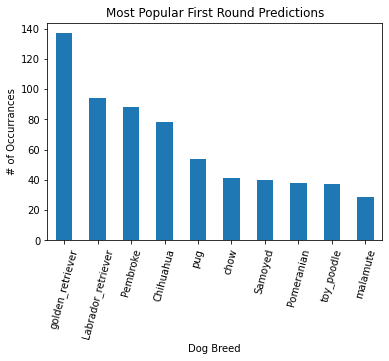

In [132]:
from matplotlib import pyplot as plt
top_first_predictions.plot(kind = 'bar', title= 'Most Popular First Round Predictions', xlabel= 'Dog Breed', ylabel= '# of Occurrances')
plt.xticks(rotation = 75)
plt.show()

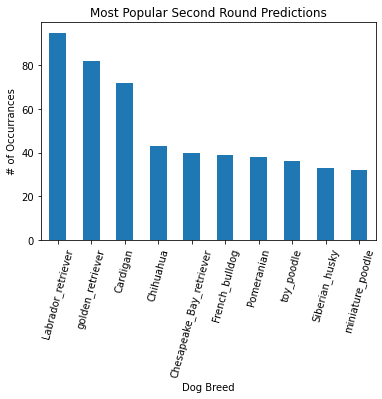

In [134]:
top_second_predictions.plot(kind = 'bar', title= 'Most Popular Second Round Predictions', xlabel= 'Dog Breed', ylabel= '# of Occurrances')
plt.xticks(rotation =75)
plt.show()

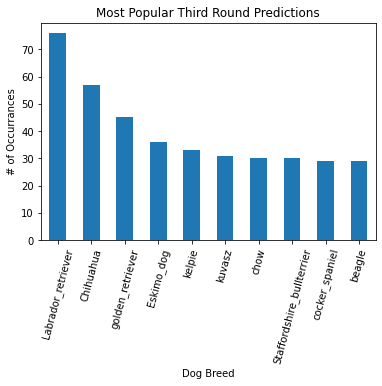

In [133]:
top_third_prediction.plot(kind = 'bar', title= 'Most Popular Third Round Predictions', xlabel= 'Dog Breed', ylabel= '# of Occurrances')
plt.xticks(rotation = 75)
plt.show()